In [1]:
import psycopg2 as pg2
from psycopg2.extras import RealDictCursor
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def con_cur_to_bgg_db():
    con = pg2.connect(host='34.216.22.202',
                  dbname='postgres',
                  user='postgres')
    cur = con.cursor(cursor_factory=RealDictCursor)
    return con, cur

# Number of ratings

In [67]:
con, cur = con_cur_to_bgg_db()
cur.execute('SELECT gid, COUNT(*) FROM clean_ratings \
GROUP BY gid')
results = cur.fetchall()
con.close()

In [68]:
df = pd.DataFrame(results)

In [69]:
df.set_index('gid', inplace=True)

In [43]:
sum((df['count'] >= 50000))

5

In [70]:
df.sort_values('count', inplace=True)

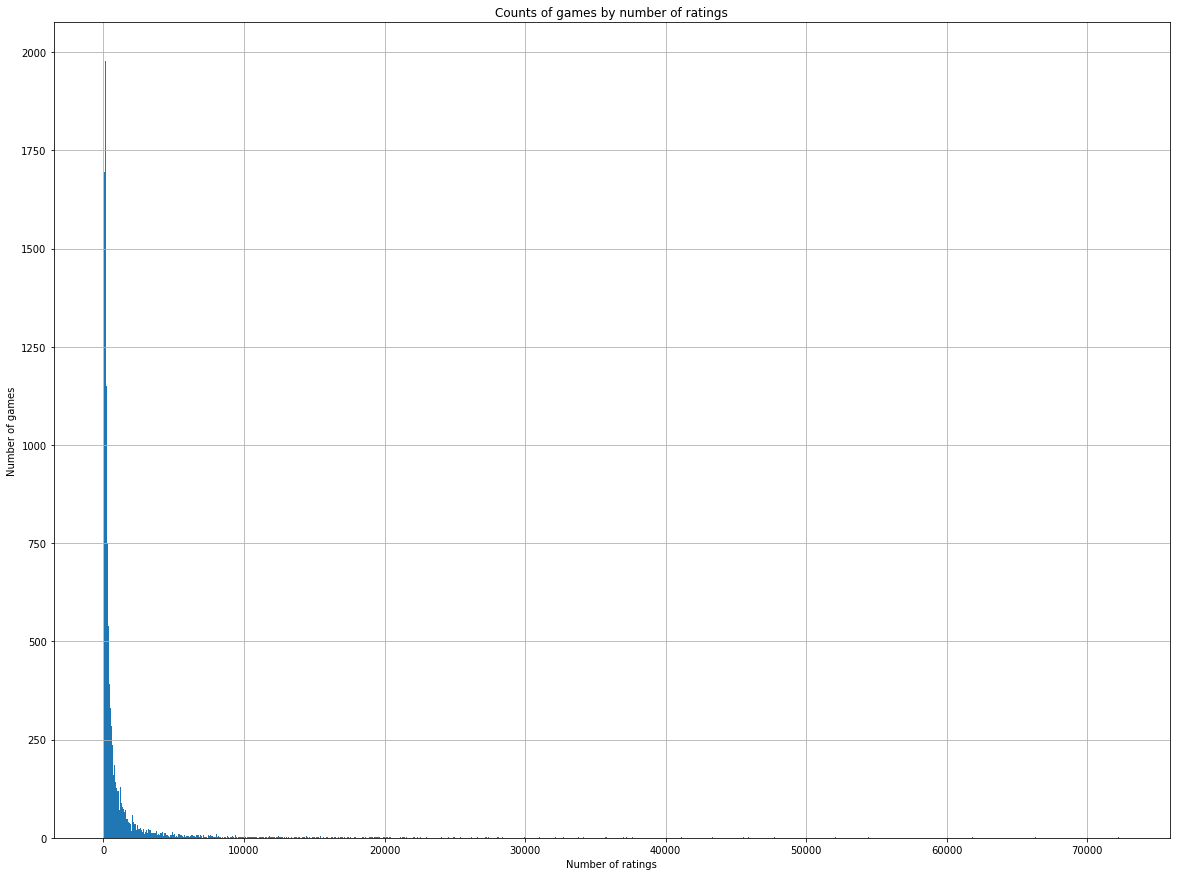

In [71]:
df.hist('count', bins=1000, figsize=(20,15))
plt.xlabel('Number of ratings')
plt.ylabel('Number of games')
plt.title('Counts of games by number of ratings')

In [72]:
df.insert(1, 'order', range(10000))

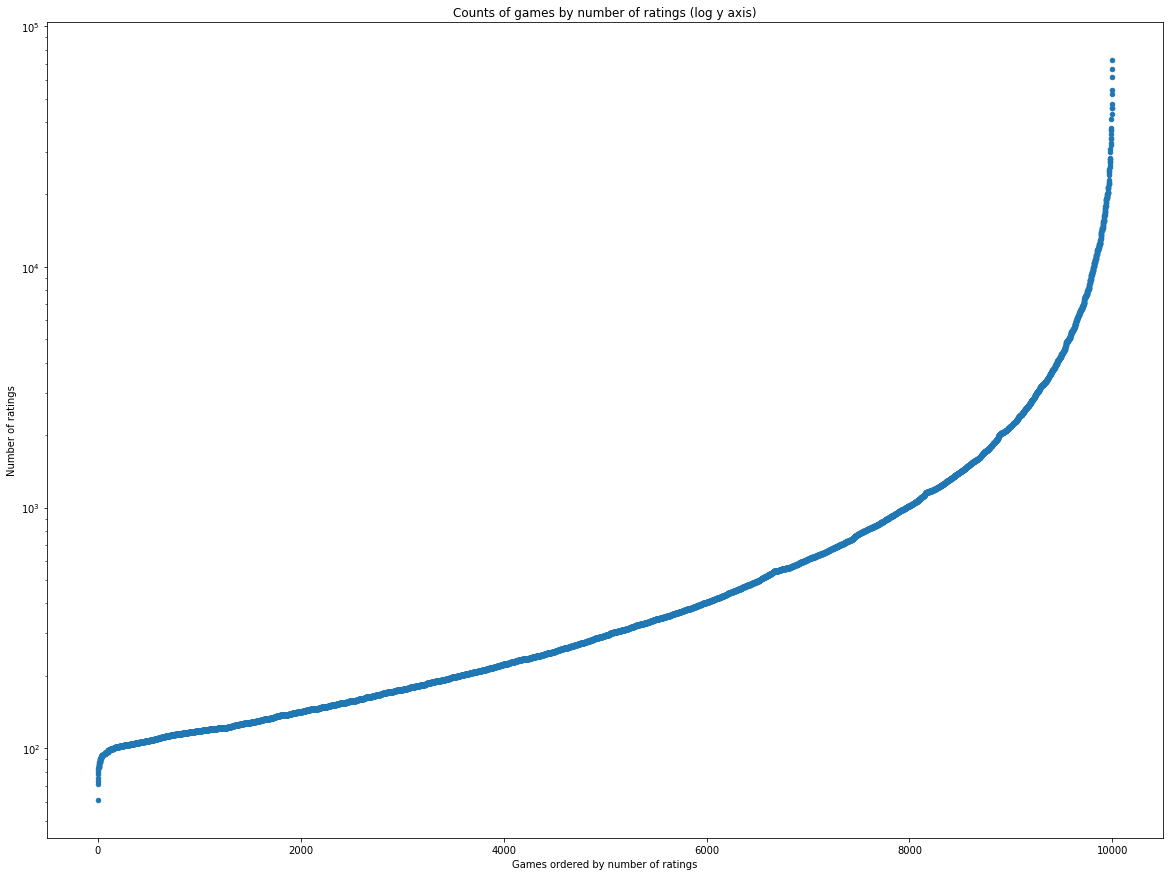

In [73]:
df.plot(x='order', y='count', kind='scatter', figsize=(20,15), logy='True')
plt.xlabel('Games ordered by number of ratings')
plt.ylabel('Number of ratings')
plt.title('Counts of games by number of ratings (log y axis)')

# Average ratings

In [74]:
con, cur = con_cur_to_bgg_db()
cur.execute('SELECT gid, AVG(rating) FROM clean_ratings \
GROUP BY gid')
avgs = cur.fetchall()
con.close()

In [75]:
mean_df = pd.DataFrame(avgs)

In [76]:
mean_df.set_index('gid', inplace=True)

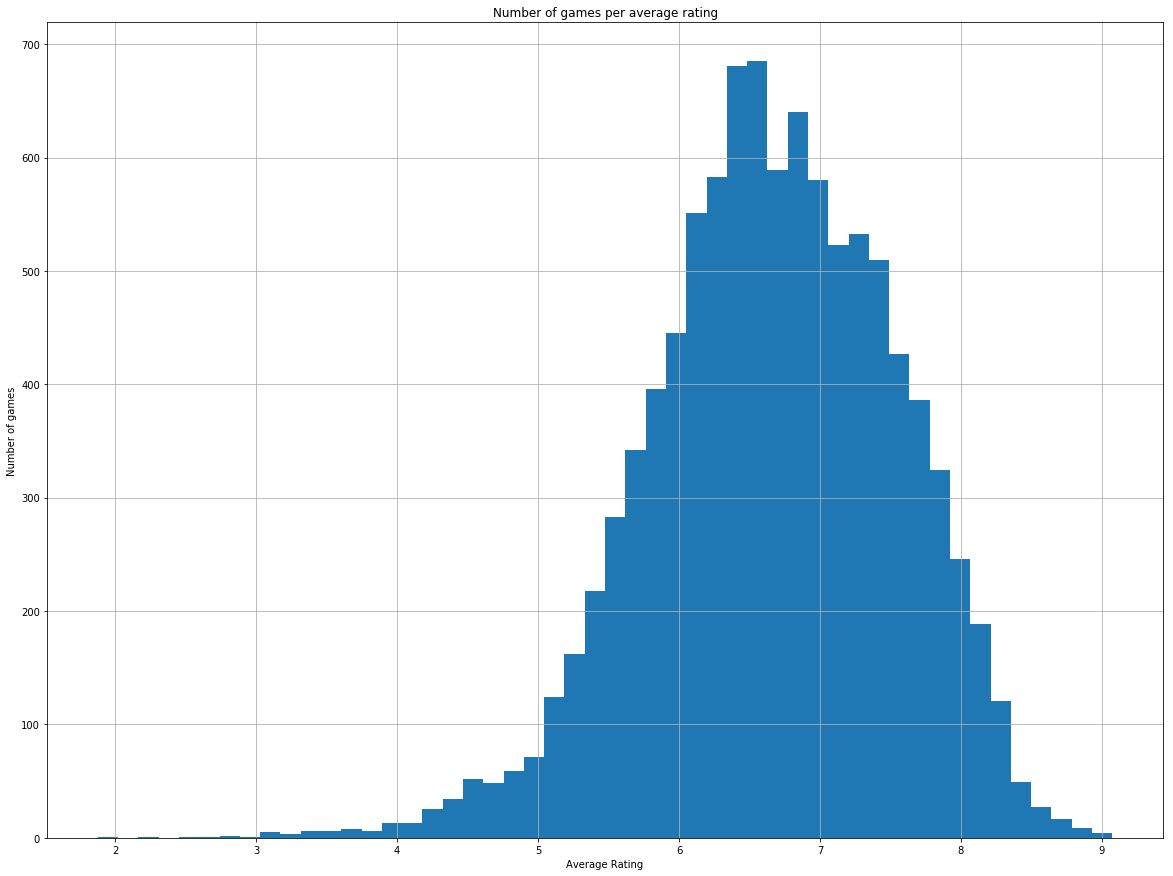

In [77]:
mean_df.hist('avg', figsize=(20,15), bins=50)
plt.xlabel('Average Rating')
plt.ylabel('Number of games')
plt.title('Number of games per average rating')

In [78]:
mean_count_df = mean_df.merge(df, left_index=True, right_index=True)

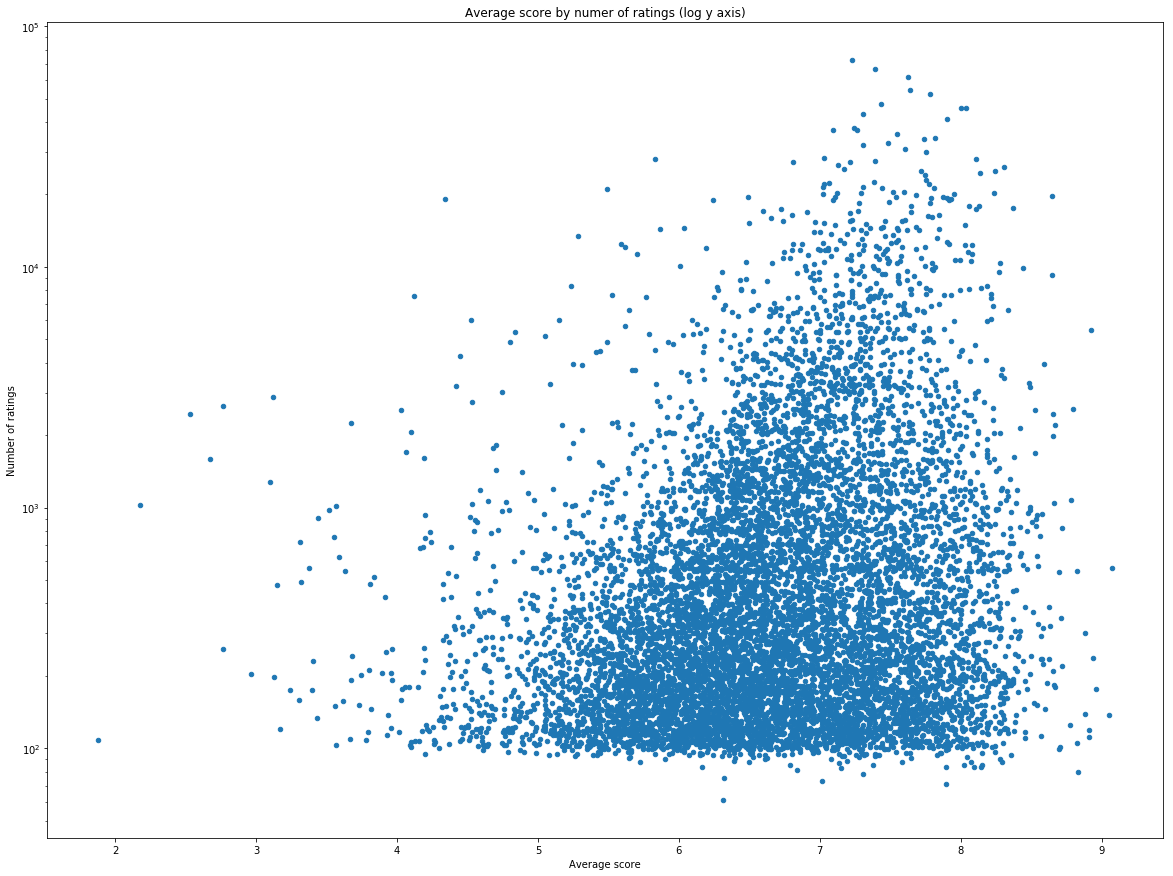

In [79]:
mean_count_df.plot(x='avg', y='count', kind='scatter', figsize=(20,15), logy=True)
plt.xlabel('Average score')
plt.ylabel('Number of ratings')
plt.title('Average score by numer of ratings (log y axis)')

In [182]:
mean_count_df[['avg', 'count']].corr()

,avg,count
avg,1.000000,0.157665
count,0.157665,1.000000


# Summary statistics for full rating set

In [129]:
con, cur = con_cur_to_bgg_db()
cur.execute('SELECT AVG(rating), STDDEV(rating), MAX(rating), MIN(rating), VARIANCE(rating) FROM clean_ratings')
sum_stats = cur.fetchall()
con.close()

In [130]:
ss_df = pd.DataFrame(sum_stats)

In [131]:
ss_df

,avg,max,min,stddev,variance
0,7.048242,10.0,1.0,1.565453,2.450644


In [132]:
con, cur = con_cur_to_bgg_db()
cur.execute('SELECT uid, COUNT(*), AVG(rating), STDDEV(rating), MAX(rating), MIN(rating), VARIANCE(rating) FROM clean_ratings GROUP BY uid')
sum_stats_count = cur.fetchall()
con.close()

In [133]:
ssc_df = pd.DataFrame(sum_stats_count)

In [134]:
ssc_df.set_index('uid', inplace=True)

In [135]:
sum(ssc_df['count']>=2500)

11

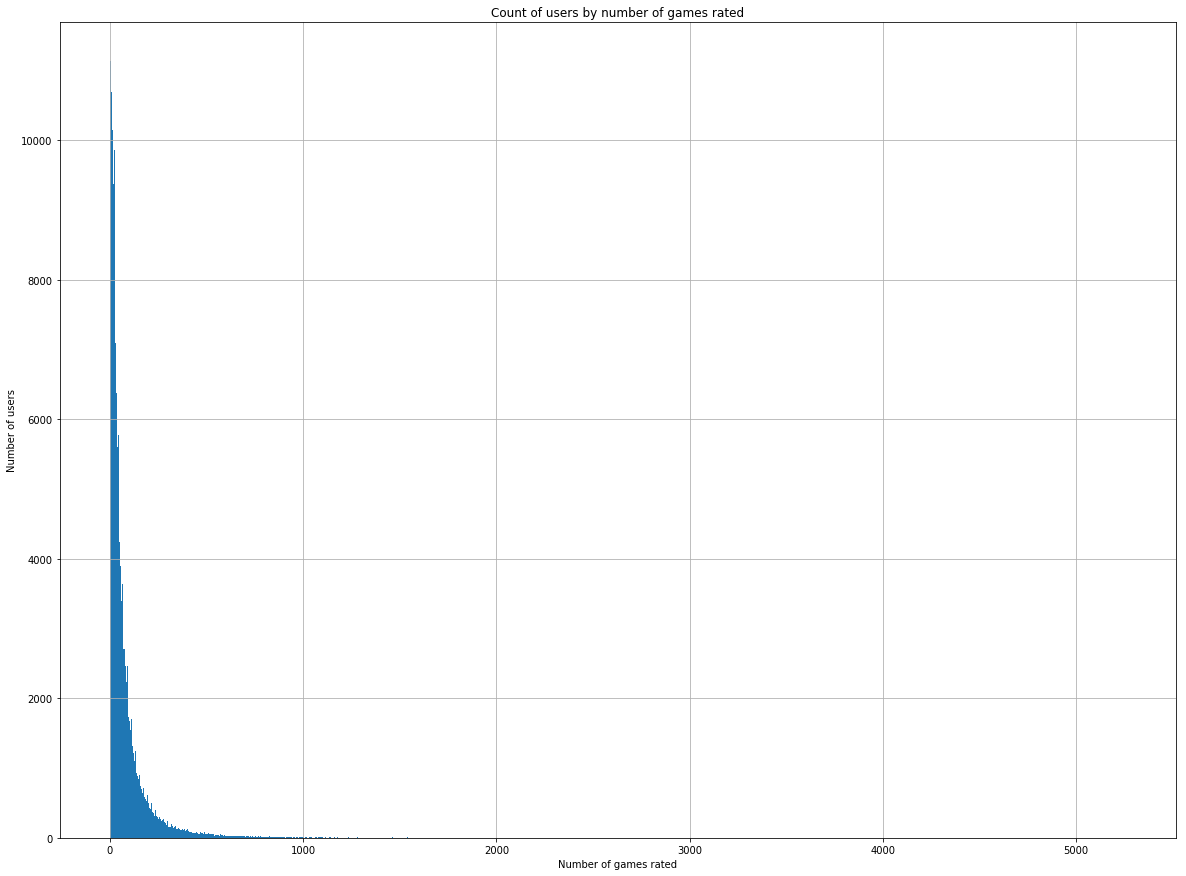

In [136]:
ssc_df.hist('count', figsize=(20,15), bins=1000)
plt.xlabel('Number of games rated')
plt.ylabel('Number of users')
plt.title('Count of users by number of games rated')

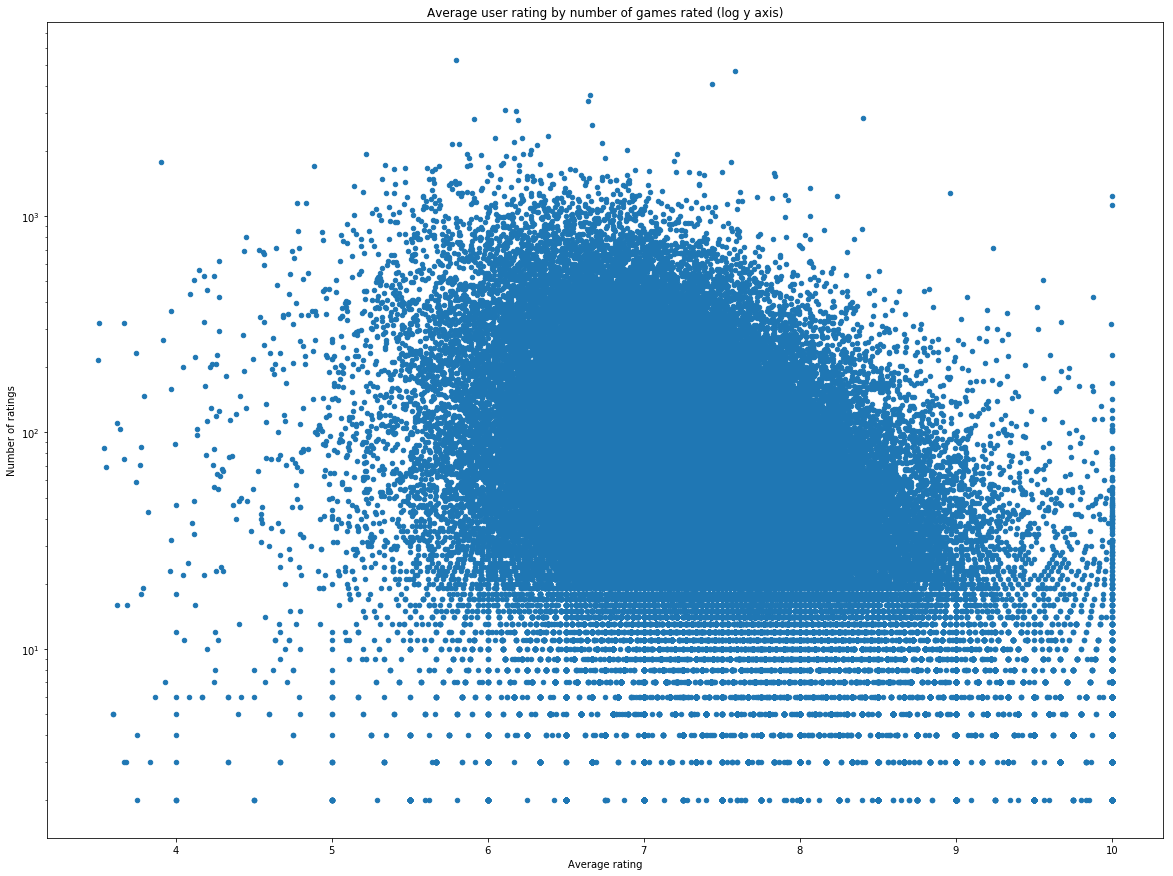

In [137]:
ssc_df.plot('avg', 'count', kind='scatter', figsize=(20,15), logy=True)
plt.xlabel('Average rating')
plt.ylabel('Number of ratings')
plt.title('Average user rating by number of games rated (log y axis)')

In [184]:
ssc_df.corr()

,avg,count,max,min,stddev,variance
avg,1.000000,-0.299395,0.235760,0.693111,-0.460793,-0.379603
count,-0.299395,1.000000,0.180172,-0.407996,0.057689,0.017572
max,0.235760,0.180172,1.000000,-0.168767,0.298793,0.228745
min,0.693111,-0.407996,-0.168767,1.000000,-0.693255,-0.561749
stddev,-0.460793,0.057689,0.298793,-0.693255,1.000000,0.935329
variance,-0.379603,0.017572,0.228745,-0.561749,0.935329,1.000000


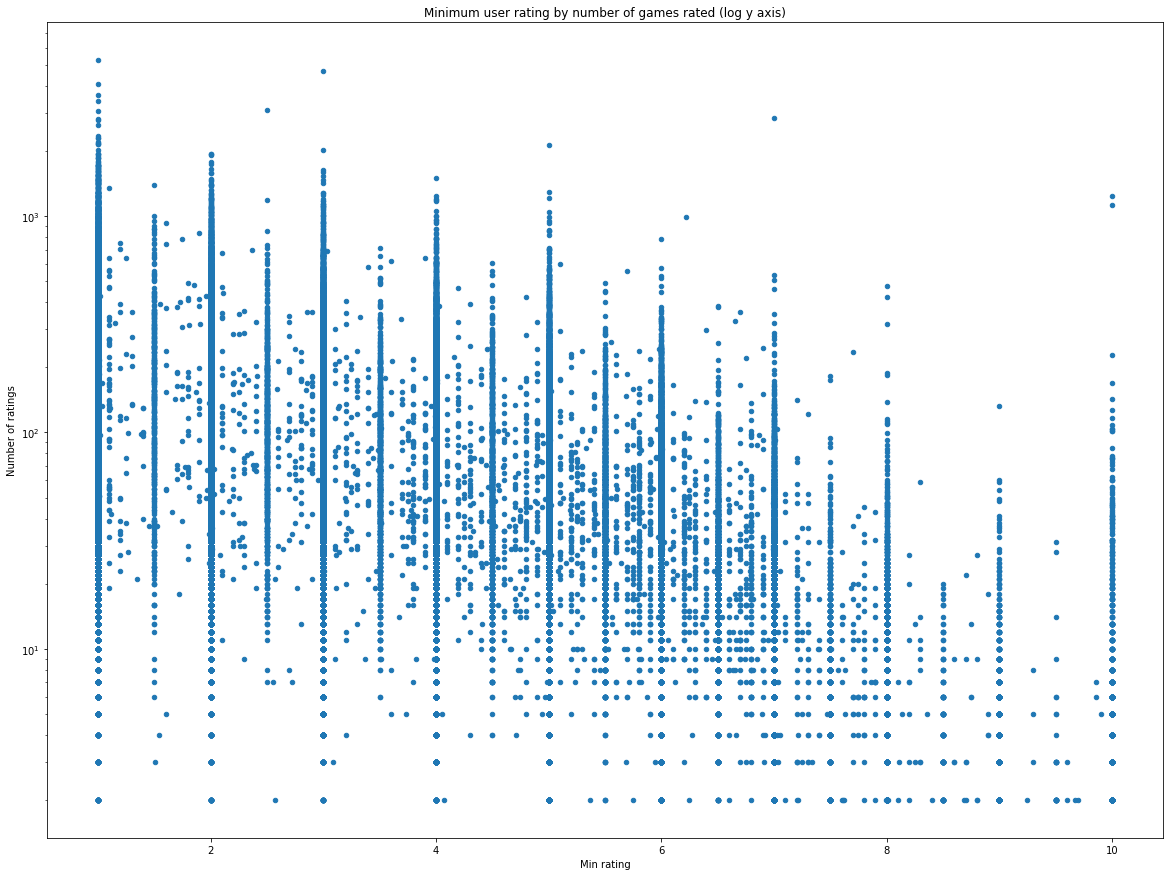

In [138]:
ssc_df.plot('min', 'count', kind='scatter', figsize=(20,15), logy=True)
plt.xlabel('Min rating')
plt.ylabel('Number of ratings')
plt.title('Minimum user rating by number of games rated (log y axis)')

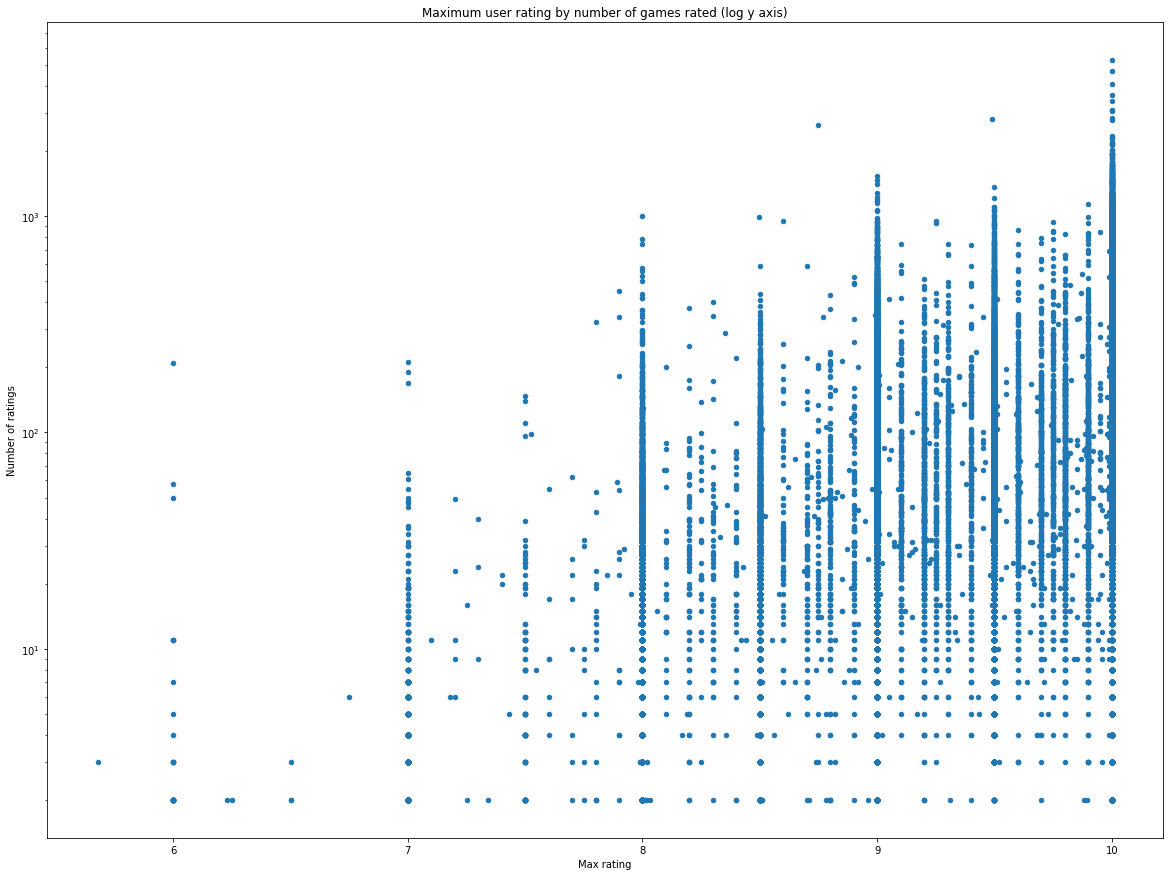

In [139]:
ssc_df.plot('max', 'count', kind='scatter', figsize=(20,15), logy=True)
plt.xlabel('Max rating')
plt.ylabel('Number of ratings')
plt.title('Maximum user rating by number of games rated (log y axis)')

# Looking at boardgame complexity (and some other features)

In [146]:
con, cur = con_cur_to_bgg_db()
cur.execute('SELECT gid, gname, complexity, age, maxplaytime, minplayers, maxplayers, yearpublished FROM boardgames')
game_feats = cur.fetchall()
con.close()

In [147]:
feats_df = pd.DataFrame(game_feats)

In [148]:
feats_df.set_index('gid', inplace=True)

In [149]:
feats_df.head()

,age,complexity,gname,maxplayers,maxplaytime,minplayers,yearpublished
gid,,,,,,,
13,10,2.3553,Catan,4,120,3,1995
822,8,1.9342,Carcassonne,5,45,2,2000
30549,8,2.4287,Pandemic,4,45,2,2008
36218,13,2.3724,Dominion,4,30,2,2008
68448,10,2.3434,7 Wonders,7,30,2,2010


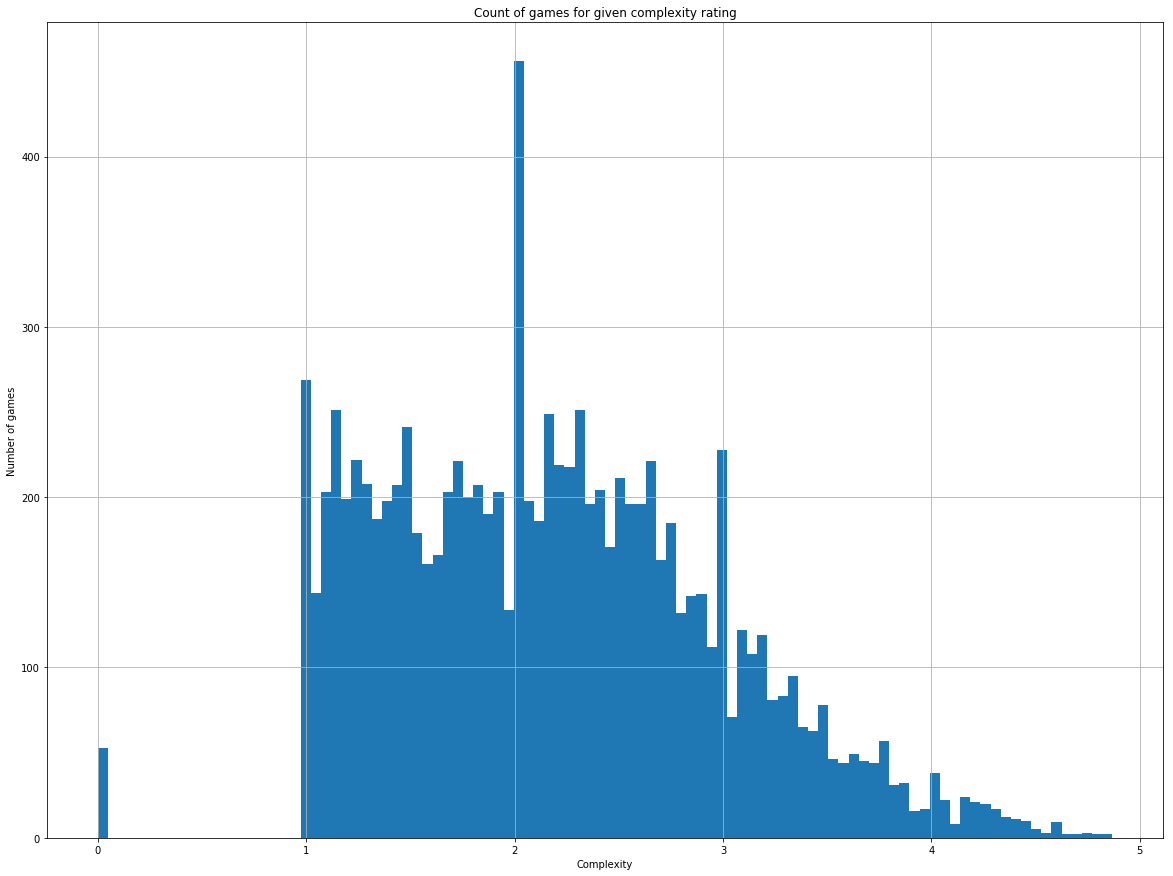

In [154]:
feats_df.hist('complexity', figsize=(20,15), bins=100)
plt.xlabel('Complexity')
plt.ylabel('Number of games')
plt.title('Count of games for given complexity rating')

In [161]:
sum(feats_df['complexity'] < 1)

53

In [151]:
feats_df[feats_df['complexity'] < 1].index

Int64Index([198487, 220502, 188699, 200751, 188339, 223770, 198942, 200750,
            204420, 199909, 194900, 212139, 215842, 198943, 199451, 198576,
            201630, 199911, 203124, 201313, 201629, 201748, 202305, 201312,
            202394, 165355, 202395, 190049, 199884, 212140, 211691, 216961,
            154778, 189273, 150385, 175436, 161928, 205905, 201310, 175653,
            205904, 197760, 202242, 196114, 224899, 150386, 202737, 230241,
            195004, 205903, 208071, 215409, 210100],
           dtype='int64', name='gid')

In [152]:
feats_avg_df = feats_df.merge(mean_df, left_index=True, right_index=True)

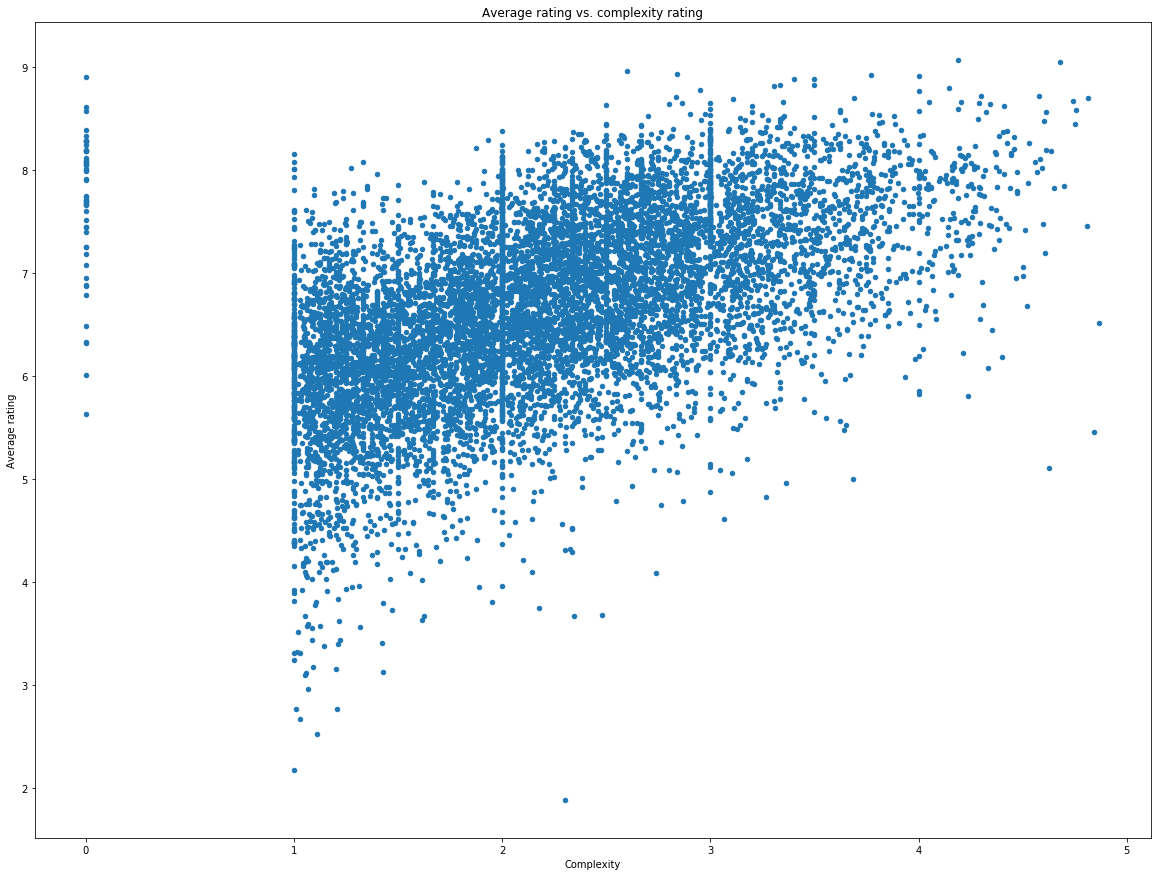

In [155]:
feats_avg_df.plot('complexity', 'avg', kind='scatter', figsize=(20,15))
plt.xlabel('Complexity')
plt.ylabel('Average rating')
plt.title('Average rating vs. complexity rating')

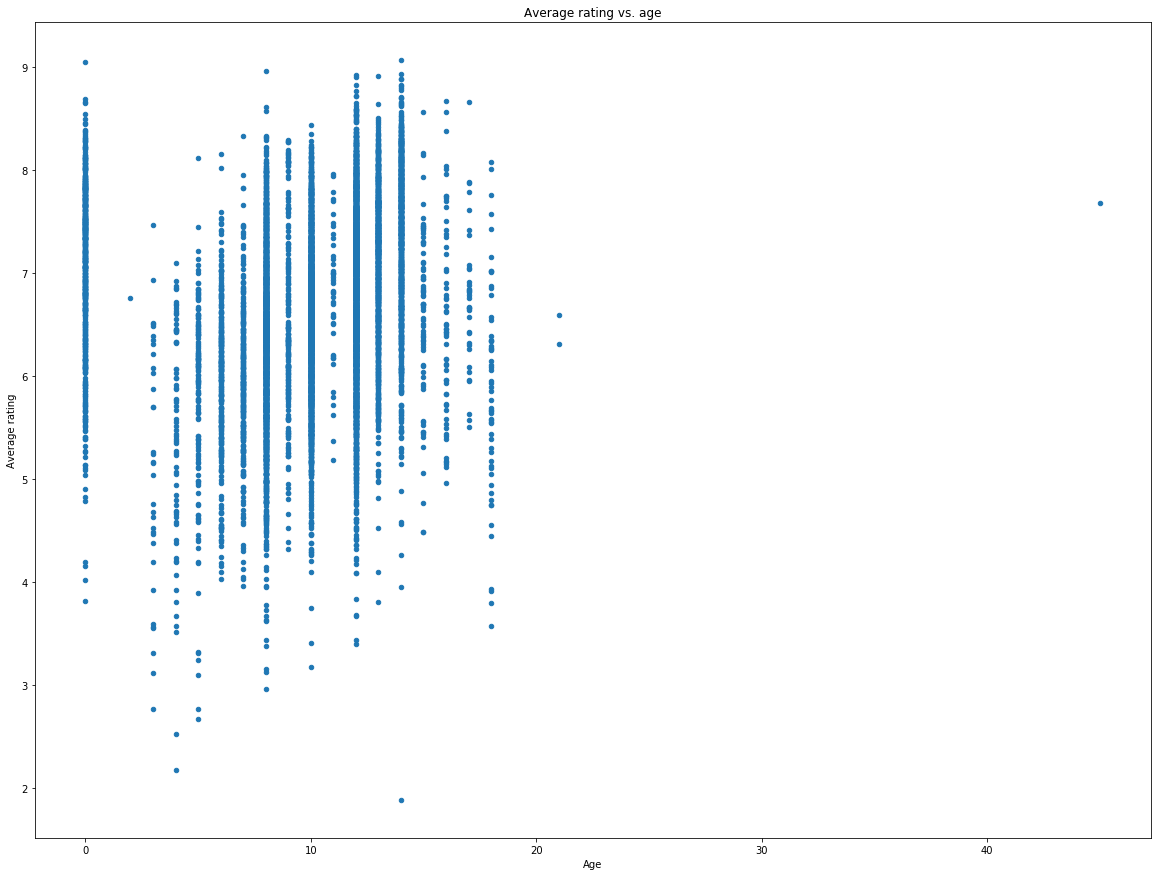

In [156]:
feats_avg_df.plot('age', 'avg', kind='scatter', figsize=(20,15))
plt.xlabel('Age')
plt.ylabel('Average rating')
plt.title('Average rating vs. age')

In [160]:
sum(feats_df['age'] < 1)

539

In [159]:
sum(feats_df['maxplaytime'] < 1)

418

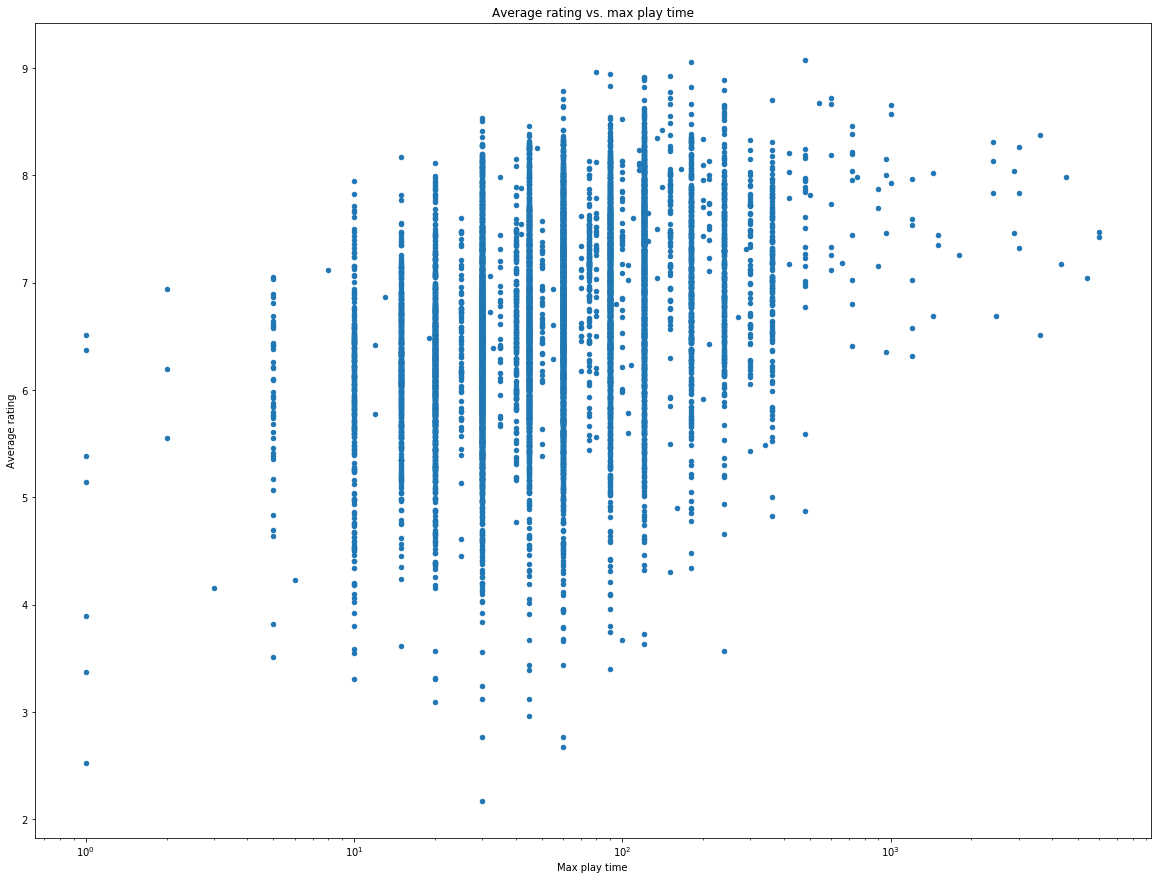

In [164]:
feats_avg_df[(feats_avg_df['maxplaytime'] > 0) & (feats_avg_df['maxplaytime'] <10000)]\
            .plot('maxplaytime', 'avg', kind='scatter', figsize=(20,15), logx=True)
plt.xlabel('Max play time')
plt.ylabel('Average rating')
plt.title('Average rating vs. max play time')

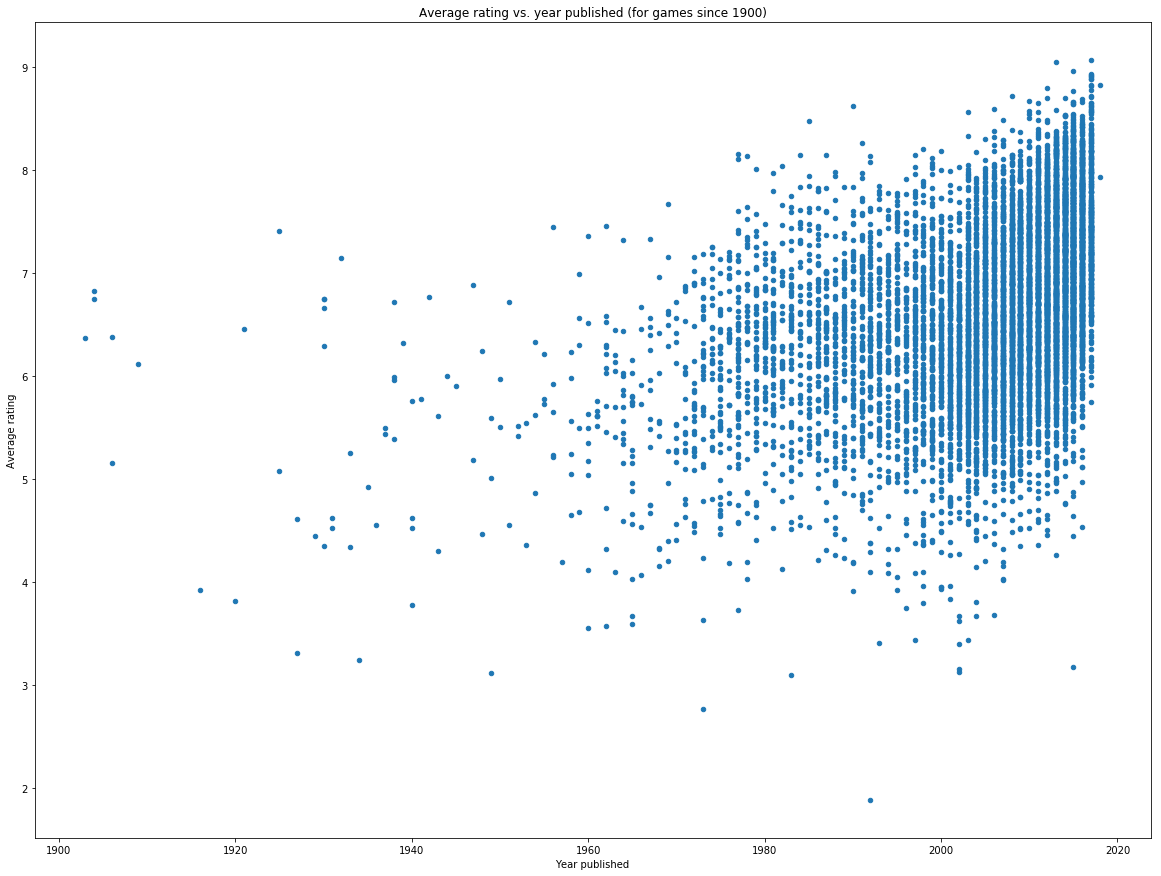

In [171]:
feats_avg_df[feats_avg_df['yearpublished'] >=1900].plot('yearpublished', 'avg', kind='scatter', figsize=(20,15))
plt.xlabel('Year published')
plt.ylabel('Average rating')
plt.title('Average rating vs. year published (for games since 1900)')

In [174]:
sum(feats_avg_df['yearpublished'] <=0)

41

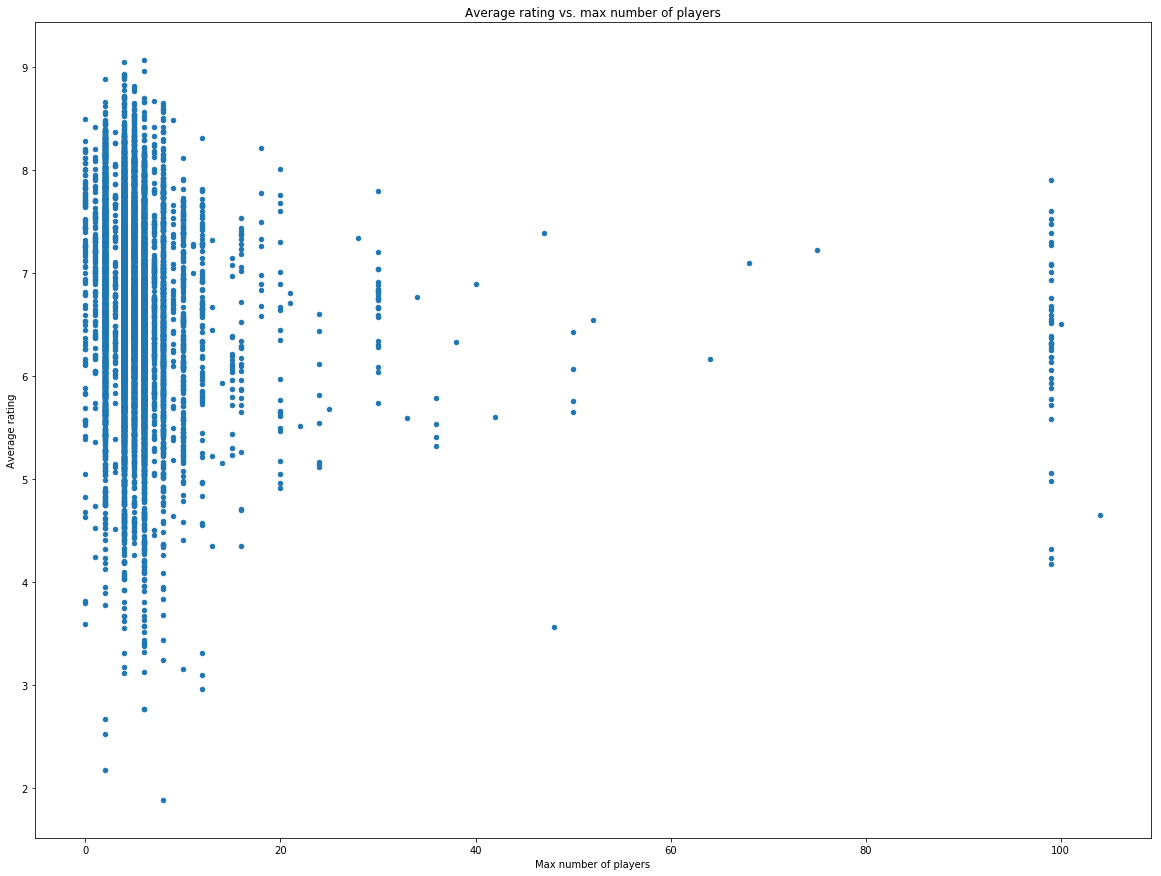

In [177]:
feats_avg_df[feats_avg_df['maxplayers']<200].plot('maxplayers', 'avg', kind='scatter', figsize=(20,15))
plt.xlabel('Max number of players')
plt.ylabel('Average rating')
plt.title('Average rating vs. max number of players')

In [179]:
sum(feats_avg_df['maxplayers']==0)

98

In [186]:
feats_avg_df.corr()

,age,complexity,maxplayers,maxplaytime,minplayers,yearpublished,avg
age,1.000000,0.299634,-0.007646,0.045538,0.050661,0.080582,0.187558
complexity,0.299634,1.000000,-0.081305,0.137279,-0.181669,0.042164,0.538726
maxplayers,-0.007646,-0.081305,1.000000,-0.002665,0.076452,0.003923,-0.039680
maxplaytime,0.045538,0.137279,-0.002665,1.000000,0.059501,0.002545,0.034862
minplayers,0.050661,-0.181669,0.076452,0.059501,1.000000,0.014648,-0.163197
yearpublished,0.080582,0.042164,0.003923,0.002545,0.014648,1.000000,0.102928
avg,0.187558,0.538726,-0.039680,0.034862,-0.163197,0.102928,1.000000
